# Problem Statement
## • Predict the Coal Production from different mines depending upon different features
# • Data Set
- Total - 1171 Rows
- 14 Features

In [ ]:
import warnings

warnings.filterwarnings('ignore')

# Import the Libraries for DataSet

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Load the DataSet

In [ ]:
file = './Data/coalpublic2015.xls'

In [ ]:
coal_df = pd.read_excel(file, header=3, index_col='MSHA ID')

In [ ]:
coal_df.shape

(1171, 15)

In [ ]:
coal_df.head()

,Year,Mine Name,Mine State,Mine County,Mine Status,Mine Type,Company Type,Operation Type,Operating Company,Operating Company Address,Union Code,Coal Supply Region,Production (short tons),Average Employees,Labor Hours
MSHA ID,,,,,,,,,,,,,,,
103381,2015,Jesse Creek H.W.M.,Alabama,Bibb,Active,Surface,Indepedent Producer Operator,Mine only,"Jesse Creek Mining,llc","1615 Kent Dairy Rd, Alabaster, AL 35007",NaN,Appalachia Southern,62598,6,13713
103246,2015,Bear Creek,Alabama,Franklin,Temporarily closed,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",NaN,Appalachia Southern,25481,9,17641
103451,2015,Knight Mine,Alabama,Franklin,Temporarily closed,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",NaN,Appalachia Southern,121474,21,51729
102933,2015,Mine No 2,Alabama,Jackson,Temporarily closed,Surface,Indepedent Producer Operator,Mine only,"Alabama Carbon, Llc","5957 Windswept Blvd, Wise, VA 24293",NaN,Appalachia Southern,3939,5,5287
100329,2015,Concord Mine,Alabama,Jefferson,Active,Underground,Operating Subsidiary,Preparation Plant,Oak Grove Resources Llc,"8360 Taylors Ferry Rd, Hueytown, AL 35023",United Mine Workers Of America,Appalachia Southern,0,52,119679


In [ ]:
# Rename the column names to avoid spaces
coal_df.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)

coal_df.head()

,Year,Mine_Name,Mine_State,Mine_County,Mine_Status,Mine_Type,Company_Type,Operation_Type,Operating_Company,Operating_Company_Address,Union_Code,Coal_Supply_Region,Production_(short_tons),Average_Employees,Labor_Hours
MSHA ID,,,,,,,,,,,,,,,
103381,2015,Jesse Creek H.W.M.,Alabama,Bibb,Active,Surface,Indepedent Producer Operator,Mine only,"Jesse Creek Mining,llc","1615 Kent Dairy Rd, Alabaster, AL 35007",NaN,Appalachia Southern,62598,6,13713
103246,2015,Bear Creek,Alabama,Franklin,Temporarily closed,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",NaN,Appalachia Southern,25481,9,17641
103451,2015,Knight Mine,Alabama,Franklin,Temporarily closed,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",NaN,Appalachia Southern,121474,21,51729
102933,2015,Mine No 2,Alabama,Jackson,Temporarily closed,Surface,Indepedent Producer Operator,Mine only,"Alabama Carbon, Llc","5957 Windswept Blvd, Wise, VA 24293",NaN,Appalachia Southern,3939,5,5287
100329,2015,Concord Mine,Alabama,Jefferson,Active,Underground,Operating Subsidiary,Preparation Plant,Oak Grove Resources Llc,"8360 Taylors Ferry Rd, Hueytown, AL 35023",United Mine Workers Of America,Appalachia Southern,0,52,119679


In [ ]:
coal_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1171 entries, 103381 to 1518524
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Year                       1171 non-null   int64 
 1   Mine_Name                  1171 non-null   object
 2   Mine_State                 1171 non-null   object
 3   Mine_County                1171 non-null   object
 4   Mine_Status                1171 non-null   object
 5   Mine_Type                  1171 non-null   object
 6   Company_Type               1171 non-null   object
 7   Operation_Type             1171 non-null   object
 8   Operating_Company          1171 non-null   object
 9   Operating_Company_Address  1171 non-null   object
 10  Union_Code                 85 non-null     object
 11  Coal_Supply_Region         1170 non-null   object
 12  Production_(short_tons)    1171 non-null   int64 
 13  Average_Employees          1171 non-null   int64 
 14  Labor

In [ ]:
coal_df.isnull().sum().sum()

1087

In [ ]:
coal_df.isnull().sum()

Year                            0
Mine_Name                       0
Mine_State                      0
Mine_County                     0
Mine_Status                     0
Mine_Type                       0
Company_Type                    0
Operation_Type                  0
Operating_Company               0
Operating_Company_Address       0
Union_Code                   1086
Coal_Supply_Region              1
Production_(short_tons)         0
Average_Employees               0
Labor_Hours                     0
dtype: int64

# Data Visualization

Text(0, 0.5, 'Labor Hours')

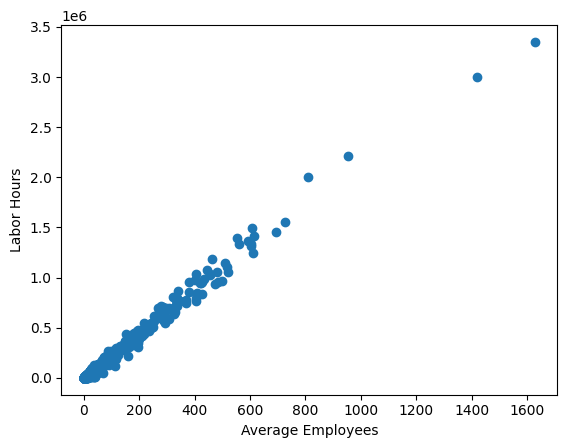

In [ ]:
plt.scatter(coal_df.Average_Employees, coal_df.Labor_Hours)

plt.xlabel("Average Employees")
plt.ylabel("Labor Hours")

<Axes: xlabel='Average_Employees', ylabel='Labor_Hours'>

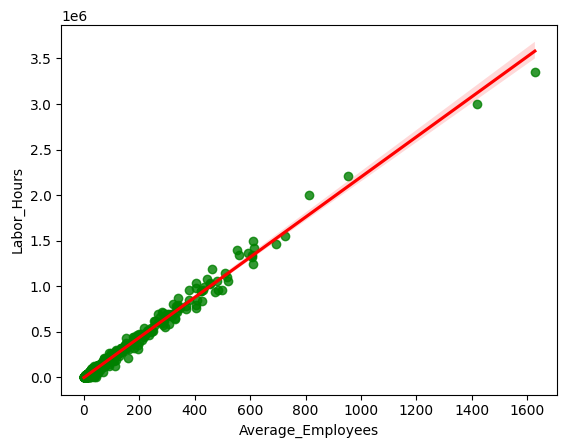

In [ ]:
sns.regplot(x = 'Average_Employees', y = 'Labor_Hours', data=coal_df, ci=95, n_boot=1000, scatter_kws={'color': 'g'}, line_kws={'color': 'red'})

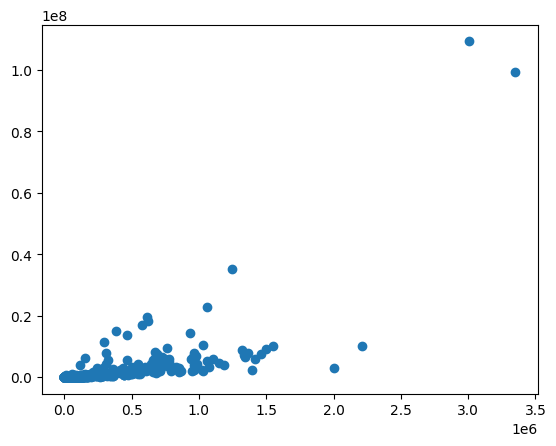

In [ ]:
plt.scatter(coal_df.Labor_Hours, coal_df['Production_(short_tons)'])

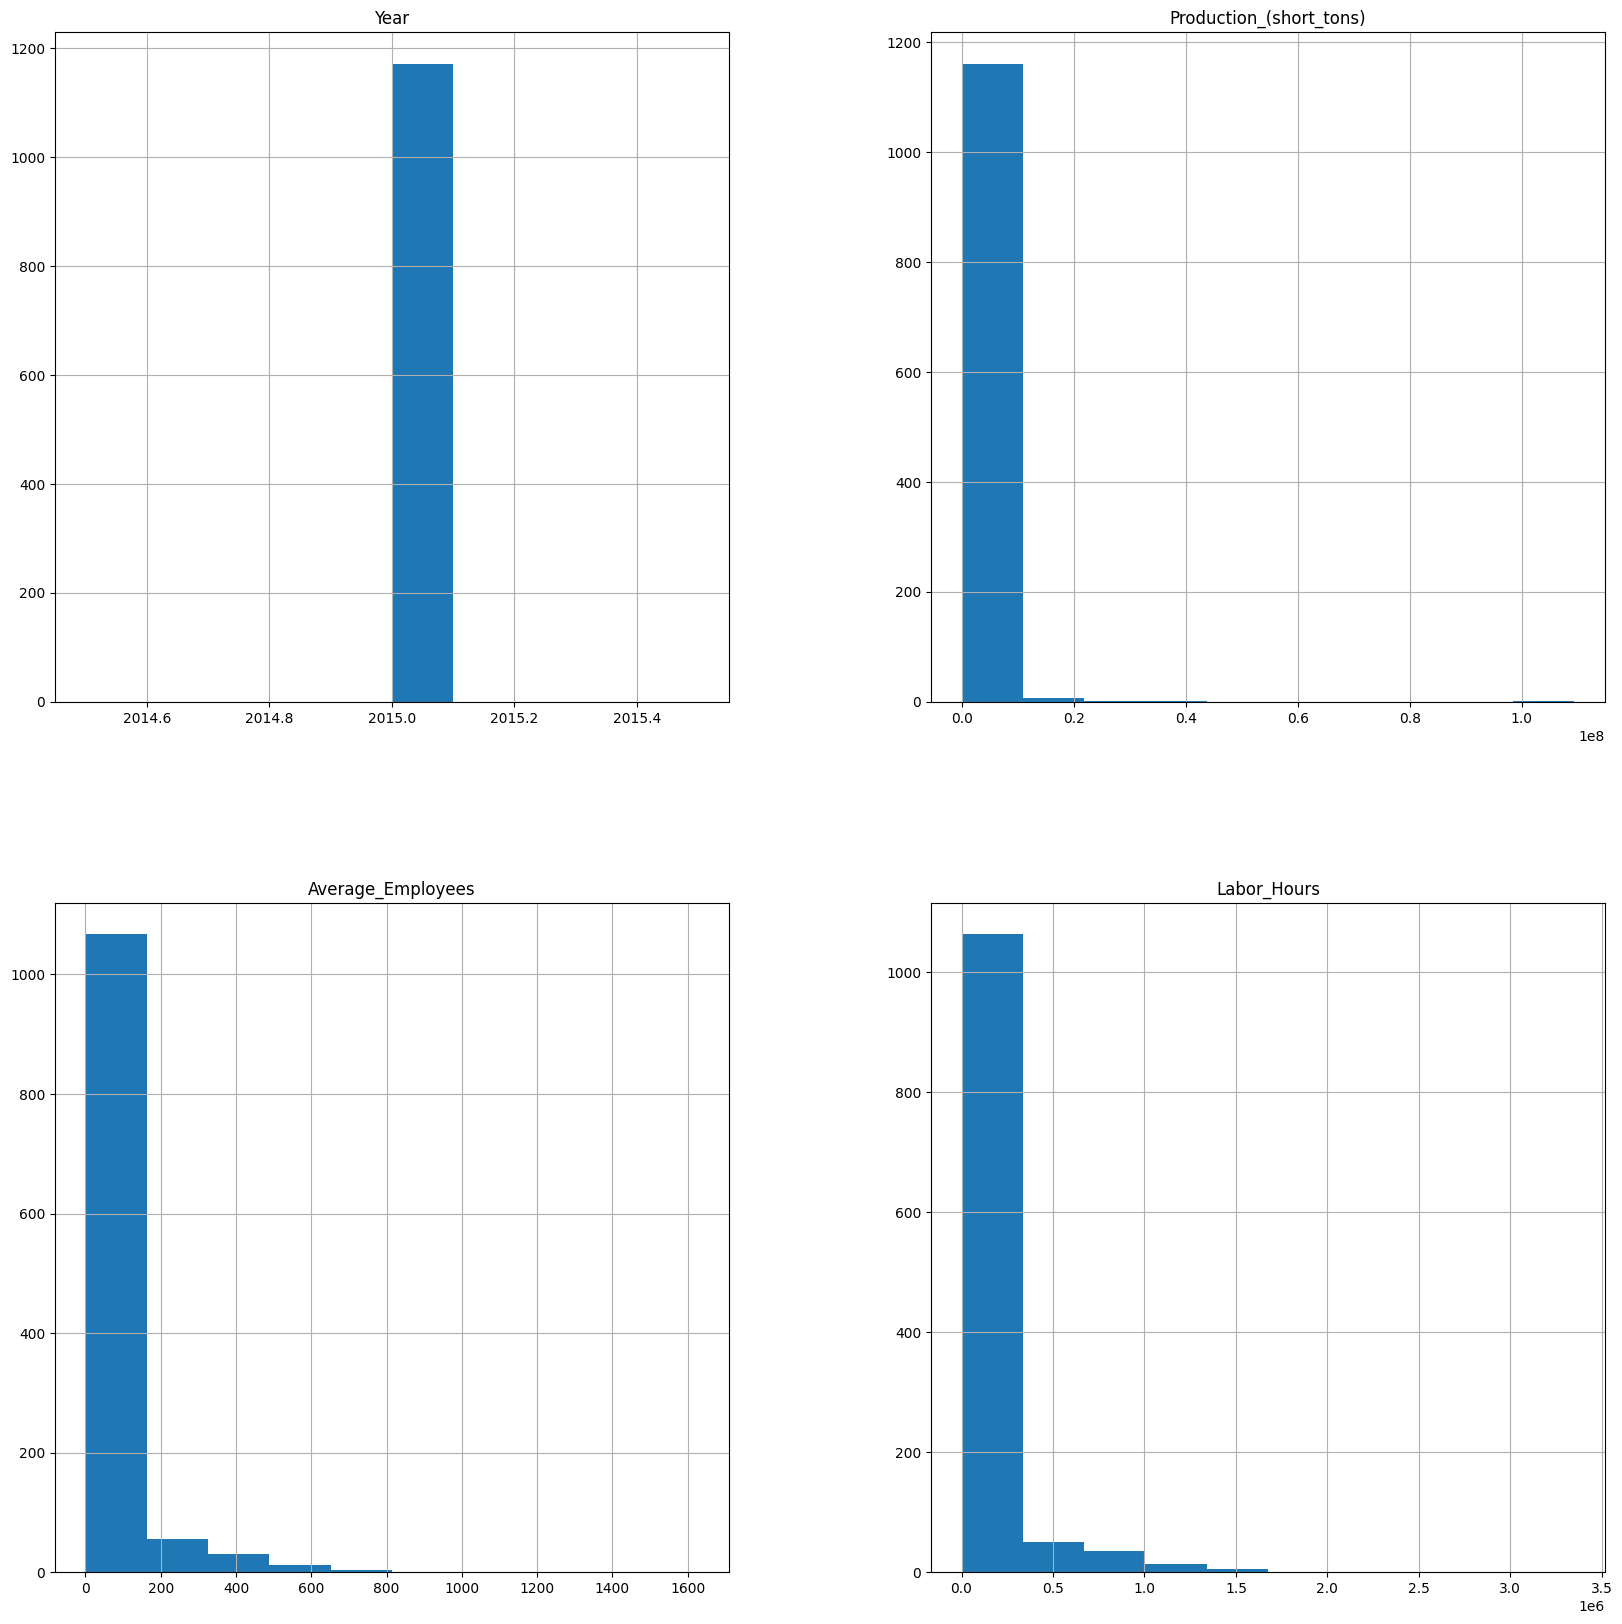

In [ ]:
coal_df.hist(figsize=(20, 20), bins=10)

plt.show()

In [ ]:
df = coal_df[coal_df['Production_(short_tons)'] > 1]

df.head()

,Year,Mine_Name,Mine_State,Mine_County,Mine_Status,Mine_Type,Company_Type,Operation_Type,Operating_Company,Operating_Company_Address,Union_Code,Coal_Supply_Region,Production_(short_tons),Average_Employees,Labor_Hours
MSHA ID,,,,,,,,,,,,,,,
103381,2015,Jesse Creek H.W.M.,Alabama,Bibb,Active,Surface,Indepedent Producer Operator,Mine only,"Jesse Creek Mining,llc","1615 Kent Dairy Rd, Alabaster, AL 35007",NaN,Appalachia Southern,62598,6,13713
103246,2015,Bear Creek,Alabama,Franklin,Temporarily closed,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",NaN,Appalachia Southern,25481,9,17641
103451,2015,Knight Mine,Alabama,Franklin,Temporarily closed,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",NaN,Appalachia Southern,121474,21,51729
102933,2015,Mine No 2,Alabama,Jackson,Temporarily closed,Surface,Indepedent Producer Operator,Mine only,"Alabama Carbon, Llc","5957 Windswept Blvd, Wise, VA 24293",NaN,Appalachia Southern,3939,5,5287
100627,2015,Flat Top Mine,Alabama,Jefferson,Active,Surface,Indepedent Producer Operator,Mine only,"Cedar Lake Mining, Inc","7802 Highway 78, Cordova, AL 35550",NaN,Appalachia Southern,256521,37,103971


In [ ]:
df['T_log_production'] = np.log(df['Production_(short_tons)'])

<Axes: >

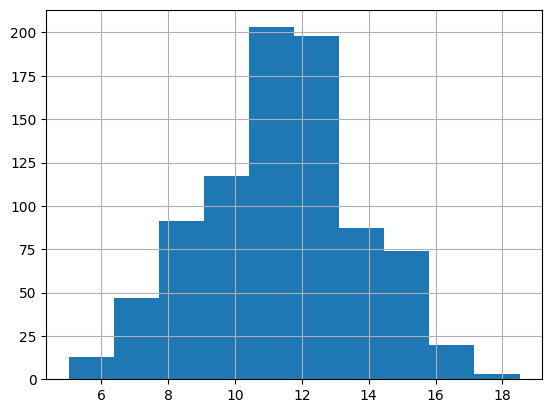

In [ ]:
df.T_log_production.hist()

# Feature Engineering

In [ ]:
df.Mine_Status.unique()

array(['Active', 'Temporarily closed', 'Permanently abandoned',
       'Active, men working, not producing'], dtype=object)

In [ ]:
df[['Mine_Status','Production_(short_tons)']].groupby('Mine_Status').mean()

,Production_(short_tons)
Mine_Status,
Active,1588046.18
"Active, men working, not producing",283470.53
Permanently abandoned,59495.39
Temporarily closed,50249.80


In [ ]:
df[['Mine_Status', 'T_log_production']].groupby('Mine_Status').mean()

,T_log_production
Mine_Status,
Active,11.98
"Active, men working, not producing",11.29
Permanently abandoned,10.12
Temporarily closed,9.20


In [ ]:
df.columns

Index(['Year', 'Mine_Name', 'Mine_State', 'Mine_County', 'Mine_Status',
       'Mine_Type', 'Company_Type', 'Operation_Type', 'Operating_Company',
       'Operating_Company_Address', 'Union_Code', 'Coal_Supply_Region',
       'Production_(short_tons)', 'Average_Employees', 'Labor_Hours',
       'T_log_production'],
      dtype='object')

In [ ]:
df.isnull().sum()

Year                           0
Mine_Name                      0
Mine_State                     0
Mine_County                    0
Mine_Status                    0
Mine_Type                      0
Company_Type                   0
Operation_Type                 0
Operating_Company              0
Operating_Company_Address      0
Union_Code                   799
Coal_Supply_Region             1
Production_(short_tons)        0
Average_Employees              0
Labor_Hours                    0
T_log_production               0
dtype: int64

In [ ]:
df.Coal_Supply_Region.unique()

array(['Appalachia Southern', 'Western', 'Interior', 'Uinta Region',
       'Illinois Basin', 'Appalachia Central', 'Appalachia Northern',
       'Powder River Basin', nan], dtype=object)

In [ ]:
df.Coal_Supply_Region.value_counts()

Coal_Supply_Region
Appalachia Central     397
Appalachia Northern    275
Illinois Basin          66
Appalachia Southern     38
Interior                27
Western                 19
Powder River Basin      16
Uinta Region            14
Name: count, dtype: int64

In [ ]:
# Replacing the null value with mode value
df['Coal_Supply_Region'][df['Coal_Supply_Region'].isnull()] = 'Appalachia Central'

In [ ]:
df.Coal_Supply_Region.value_counts()

Coal_Supply_Region
Appalachia Central     398
Appalachia Northern    275
Illinois Basin          66
Appalachia Southern     38
Interior                27
Western                 19
Powder River Basin      16
Uinta Region            14
Name: count, dtype: int64

In [ ]:
df[df['Coal_Supply_Region'].isnull()]

,Year,Mine_Name,Mine_State,Mine_County,Mine_Status,Mine_Type,Company_Type,Operation_Type,Operating_Company,Operating_Company_Address,Union_Code,Coal_Supply_Region,Production_(short_tons),Average_Employees,Labor_Hours,T_log_production
MSHA ID,,,,,,,,,,,,,,,,


In [ ]:
df.isnull().sum()

Year                           0
Mine_Name                      0
Mine_State                     0
Mine_County                    0
Mine_Status                    0
Mine_Type                      0
Company_Type                   0
Operation_Type                 0
Operating_Company              0
Operating_Company_Address      0
Union_Code                   799
Coal_Supply_Region             0
Production_(short_tons)        0
Average_Employees              0
Labor_Hours                    0
T_log_production               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 853 entries, 103381 to 1518524
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       853 non-null    int64  
 1   Mine_Name                  853 non-null    object 
 2   Mine_State                 853 non-null    object 
 3   Mine_County                853 non-null    object 
 4   Mine_Status                853 non-null    object 
 5   Mine_Type                  853 non-null    object 
 6   Company_Type               853 non-null    object 
 7   Operation_Type             853 non-null    object 
 8   Operating_Company          853 non-null    object 
 9   Operating_Company_Address  853 non-null    object 
 10  Union_Code                 54 non-null     object 
 11  Coal_Supply_Region         853 non-null    object 
 12  Production_(short_tons)    853 non-null    int64  
 13  Average_Employees          853 non-null    int

In [ ]:
feat_numerical_ = ['Average_Employees', 'Labor_Hours']

feat_catagorical_ = ['Mine_State',
               'Mine_County',
               'Mine_Status',
               'Mine_Type',
               "Company_Type",
               "Operation_Type",
               "Coal_Supply_Region"]

feat_target_ = df['T_log_production']

In [ ]:
df['Mine_County'].unique()

array(['Bibb', 'Franklin', 'Jackson', 'Jefferson', 'Shelby', 'Tuscaloosa',
       'Walker', 'Winston', 'Denali', 'Navajo', 'Sebastian', 'Delta',
       'Gunnison', 'La Plata', 'Moffat', 'Montrose', 'Rio Blanco',
       'Routt', 'Gallatin', 'Hamilton', 'Macoupin', 'Montgomery', 'Perry',
       'Randolph', 'Saline', 'Sangamon', 'Wabash', 'Washington', 'White',
       'Williamson', 'Clay', 'Daviess', 'Dubois', 'Gibson', 'Greene',
       'Knox', 'Pike', 'Sullivan', 'Warrick', 'Linn', 'Bell', 'Breathitt',
       'Floyd', 'Harlan', 'Hopkins', 'Johnson', 'Knott', 'Laurel',
       'Lawrence', 'Leslie', 'Letcher', 'Mclean', 'Magoffin', 'Martin',
       'Muhlenberg', 'Ohio', 'Union', 'Webster', 'Whitley', 'Wolfe',
       'De Soto', 'Natchitoches', 'Allegany', 'Garrett', 'Choctaw',
       'Kemper', 'Bates', 'Big Horn', 'Musselshell', 'Richland',
       'Rosebud', 'Mckinley', 'San Juan', 'Mercer', 'Oliver', 'Belmont',
       'Carroll', 'Guernsey', 'Harrison', 'Monroe', 'Noble', 'Stark',
       'Tu

In [ ]:
len(df['Mine_County'].unique())

151

In [ ]:
for cat in feat_catagorical_:
  print(" " + cat + " " + '--->' + " ", len(df[cat].unique()))

 Mine_State --->  29
 Mine_County --->  151
 Mine_Status --->  4
 Mine_Type --->  3
 Company_Type --->  3
 Operation_Type --->  2
 Coal_Supply_Region --->  8


In [ ]:
# Mine State
names = df.Mine_State.value_counts() < 15
names_df = pd.DataFrame(names)

final_names = names_df[names_df['count'] == True]
final_names.index

Index(['Texas', 'Tennessee', 'Colorado', 'Utah', 'Montana', 'Oklahoma',
       'North Dakota', 'New Mexico', 'Mississippi', 'Louisiana', 'Arkansas',
       'Alaska', 'Arizona', 'Missouri', 'Kansas'],
      dtype='object', name='Mine_State')

In [ ]:
df['Mine_State_With_Rare'] = df.Mine_State

for val in final_names.index:
  df.loc[df.Mine_State == val, 'Mine_State_With_Rare'] = 'Rare'

In [ ]:
df.head()

,Year,Mine_Name,Mine_State,Mine_County,Mine_Status,Mine_Type,Company_Type,Operation_Type,Operating_Company,Operating_Company_Address,Union_Code,Coal_Supply_Region,Production_(short_tons),Average_Employees,Labor_Hours,T_log_production,Mine_State_With_Rare
MSHA ID,,,,,,,,,,,,,,,,,
103381,2015,Jesse Creek H.W.M.,Alabama,Bibb,Active,Surface,Indepedent Producer Operator,Mine only,"Jesse Creek Mining,llc","1615 Kent Dairy Rd, Alabaster, AL 35007",NaN,Appalachia Southern,62598,6,13713,11.04,Alabama
103246,2015,Bear Creek,Alabama,Franklin,Temporarily closed,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",NaN,Appalachia Southern,25481,9,17641,10.15,Alabama
103451,2015,Knight Mine,Alabama,Franklin,Temporarily closed,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",NaN,Appalachia Southern,121474,21,51729,11.71,Alabama
102933,2015,Mine No 2,Alabama,Jackson,Temporarily closed,Surface,Indepedent Producer Operator,Mine only,"Alabama Carbon, Llc","5957 Windswept Blvd, Wise, VA 24293",NaN,Appalachia Southern,3939,5,5287,8.28,Alabama
100627,2015,Flat Top Mine,Alabama,Jefferson,Active,Surface,Indepedent Producer Operator,Mine only,"Cedar Lake Mining, Inc","7802 Highway 78, Cordova, AL 35550",NaN,Appalachia Southern,256521,37,103971,12.45,Alabama


In [ ]:
df.Mine_State_With_Rare.value_counts()

Mine_State_With_Rare
Kentucky (East)              193
Pennsylvania (Bituminous)    137
West Virginia (Southern)     125
Rare                          70
Virginia                      65
Pennsylvania (Anthracite)     58
Alabama                       37
West Virginia (Northern)      26
Ohio                          25
Indiana                       24
Illinois                      23
Refuse Recovery               19
Maryland                      18
Kentucky (West)               17
Wyoming                       16
Name: count, dtype: int64

In [ ]:
len(df.Mine_County.value_counts())

151

In [ ]:
df.Mine_County.value_counts()

Mine_County
Pike          55
Schuylkill    40
Clearfield    33
Mcdowell      31
Buchanan      28
              ..
Davidson       1
Atascosa       1
Monroe         1
Lee            1
Bibb           1
Name: count, Length: 151, dtype: int64

In [ ]:
county = df.Mine_County.value_counts() <= 5
county_df = pd.DataFrame(county)

final_county = county_df[county_df['count'] == True]
final_county.index

Index(['Lawrence', 'Leslie', 'Tuscaloosa', 'Johnson', 'Gibson', 'Washington',
       'Tazewell', 'Carbon', 'Martin', 'Warrick',
       ...
       'Wolfe', 'Union', 'Lycoming', 'Venango', 'Linn', 'Davidson', 'Atascosa',
       'Monroe', 'Lee', 'Bibb'],
      dtype='object', name='Mine_County', length=108)

In [ ]:
df['Mine_County_With_Rare'] = df.Mine_County

for val in final_county.index:
  df.loc[df.Mine_County == val, 'Mine_County_With_Rare'] = 'Rare'

In [ ]:
len(df.Mine_County_With_Rare.value_counts())

44

In [ ]:
df.Mine_County_With_Rare.value_counts()

Mine_County_With_Rare
Rare              200
Pike               55
Schuylkill         40
Clearfield         33
Mcdowell           31
Buchanan           28
Perry              25
Indiana            25
Harlan             22
Jefferson          22
Logan              22
Somerset           20
Floyd              19
Boone              18
Letcher            16
Wise               16
Northumberland     15
Knox               14
Walker             14
Dickenson          13
Raleigh            13
Campbell           12
Kanawha            12
Fayette            12
Whitley            12
Bell               12
Allegany           10
Luzerne             8
Armstrong           8
Harrison            8
Greene              8
Garrett             8
Claiborne           8
Cambria             8
Ohio                8
Knott               7
Webster             7
Greenbrier          7
Westmoreland        7
Russell             6
Marion              6
Mingo               6
Saline              6
Wyoming             6
Name: coun

In [ ]:
del(df['Year'])
del(df['Mine_Name'])
del(df['Union_Code'])
del(df['Operating_Company'])
del(df['Operating_Company_Address'])
del(df['Production_(short_tons)'])

In [ ]:
del(df['Mine_County'])
del(df['Mine_State'])

In [ ]:
df.columns

Index(['Mine_Status', 'Mine_Type', 'Company_Type', 'Operation_Type',
       'Coal_Supply_Region', 'Average_Employees', 'Labor_Hours',
       'T_log_production', 'Mine_State_With_Rare', 'Mine_County_With_Rare'],
      dtype='object')

In [ ]:
feat_numerical_ = ['Average_Employees', 'Labor_Hours']

feat_catagorical_ = ['Mine_State_With_Rare',
               'Mine_County_With_Rare',
               'Mine_Status',
               'Mine_Type',
               "Company_Type",
               "Operation_Type",
               "Coal_Supply_Region"]

feat_target_ = df['T_log_production']

In [ ]:
df.shape

(853, 10)

In [ ]:
df_ = df.copy()

In [ ]:
df = df_.copy()

In [ ]:
totalFeat = 0

for cat in feat_catagorical_:
  print(" " + cat + "--->" + " ", len(df[cat].unique()))
  totalFeat = totalFeat + len(df[cat].unique())

print(f"\n Total Categorical Features  :  {totalFeat}")

 Mine_State_With_Rare--->  15
 Mine_County_With_Rare--->  44
 Mine_Status--->  4
 Mine_Type--->  3
 Company_Type--->  3
 Operation_Type--->  2
 Coal_Supply_Region--->  8

 Total Categorical Features  :  79


In [ ]:
# Convert Categorical Features to Neumeric

dummy_cats = []

for cate in feat_catagorical_:
  print(f"Converting the Categorical Feature - {cate}")
  temp_ = pd.get_dummies(df[cate])
  df = pd.concat([df, temp_], axis=1)

Converting the Categorical Feature - Mine_State_With_Rare
Converting the Categorical Feature - Mine_County_With_Rare
Converting the Categorical Feature - Mine_Status
Converting the Categorical Feature - Mine_Type
Converting the Categorical Feature - Company_Type
Converting the Categorical Feature - Operation_Type
Converting the Categorical Feature - Coal_Supply_Region


In [ ]:
df.shape

(853, 89)

In [ ]:
# Removing the original Categorical Features
for col in feat_catagorical_:
  del(df[col])
  print(f"Deleted the original categorical field of  :  {col}")
print("Deleted All original Categorical Fields.")

Deleted the original categorical field of  :  Mine_State_With_Rare
Deleted the original categorical field of  :  Mine_County_With_Rare
Deleted the original categorical field of  :  Mine_Status
Deleted the original categorical field of  :  Mine_Type
Deleted the original categorical field of  :  Company_Type
Deleted the original categorical field of  :  Operation_Type
Deleted the original categorical field of  :  Coal_Supply_Region
Deleted All original Categorical Fields.


In [ ]:
df.shape

(853, 82)

In [ ]:
X = df
Y = df['T_log_production']

print(f"The Shape of X  :  {X.shape}")
print(f"The Shape of Y  :  {Y.shape}")

The Shape of X  :  (853, 82)
The Shape of Y  :  (853,)


# Importing Libraries for Model Building and Evaluation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import (GridSearchCV, RandomizedSearchCV)
from sklearn.metrics import (mean_squared_error, mean_absolute_error, r2_score)
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRFRegressor

from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge,LogisticRegression

# Model Building and Evaluation

In [ ]:
from math import sqrt

models_scores = []

def fitAndEvaluateModel(X, Y, model_name, model_algo, params, CV):

  np.random.seed(10)

  # Splitting the data
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10)

  # Fitting in GridSearch Params
  grid = GridSearchCV(
      estimator=model_algo,
      param_grid=params,
      cv = CV,
      verbose=1,
      n_jobs=-1
  )

  grid_res = grid.fit(X_train, Y_train)

  best_params = grid_res.best_params_
  Y_pred = grid_res.predict(X_test)

  mse = mean_squared_error(np.exp(Y_test), np.exp(Y_pred))
  rmse = sqrt(mse)
  mae = mean_absolute_error(np.exp(Y_test), np.exp(Y_pred))
  r2 = r2_score(np.exp(Y_test), np.exp(Y_pred))

  models_scores.append({
      'Model': model_name,
      'MSE': mse,
      'RMSE': rmse,
      'MAE': mae,
      'R2': r2
    })

  output_df = pd.DataFrame(list(zip(np.exp(Y_test), np.exp(Y_pred))))
  output_df.columns = ['Original', 'Predicted']
  output_df['Difference'] = output_df.Original - output_df.Predicted
  print(output_df)

  plt.figure(figsize=(20, 14))
  sns.regplot(x = np.exp(Y_test), y = np.exp(Y_pred), line_kws={'color': 'red'})

  print(f"Best Params : {best_params}")
  print('Root Mean squared error {}'.format(sqrt(mean_squared_error(np.exp(Y_test), np.exp(Y_pred)))))
  # print(f"MSE : {mse}")
  # print(f"MSE : {rmse}")
  # print(f"MAE : {mae}")
  # print(f"R2 : {r2}")

pd.options.display.float_format = '{:.2f}'.format



> ### Random Forest



Fitting 5 folds for each of 54 candidates, totalling 270 fits
     Original  Predicted  Difference
0  2406437.00 2389838.10    16598.90
1  1087329.00 1103539.64   -16210.64
2  2155473.00 2115250.50    40222.50
3   194714.00  194949.27     -235.27
4    22011.00   21804.63      206.37
..        ...        ...         ...
81  675725.00  671432.42     4292.58
82  112763.00  112323.18      439.82
83  273017.00  271269.23     1747.77
84  240608.00  242295.65    -1687.65
85   15481.00   15602.36     -121.36

[86 rows x 3 columns]
Best Params : {'max_depth': 7, 'n_estimators': 500}
Root Mean squared error 20085.05347099003


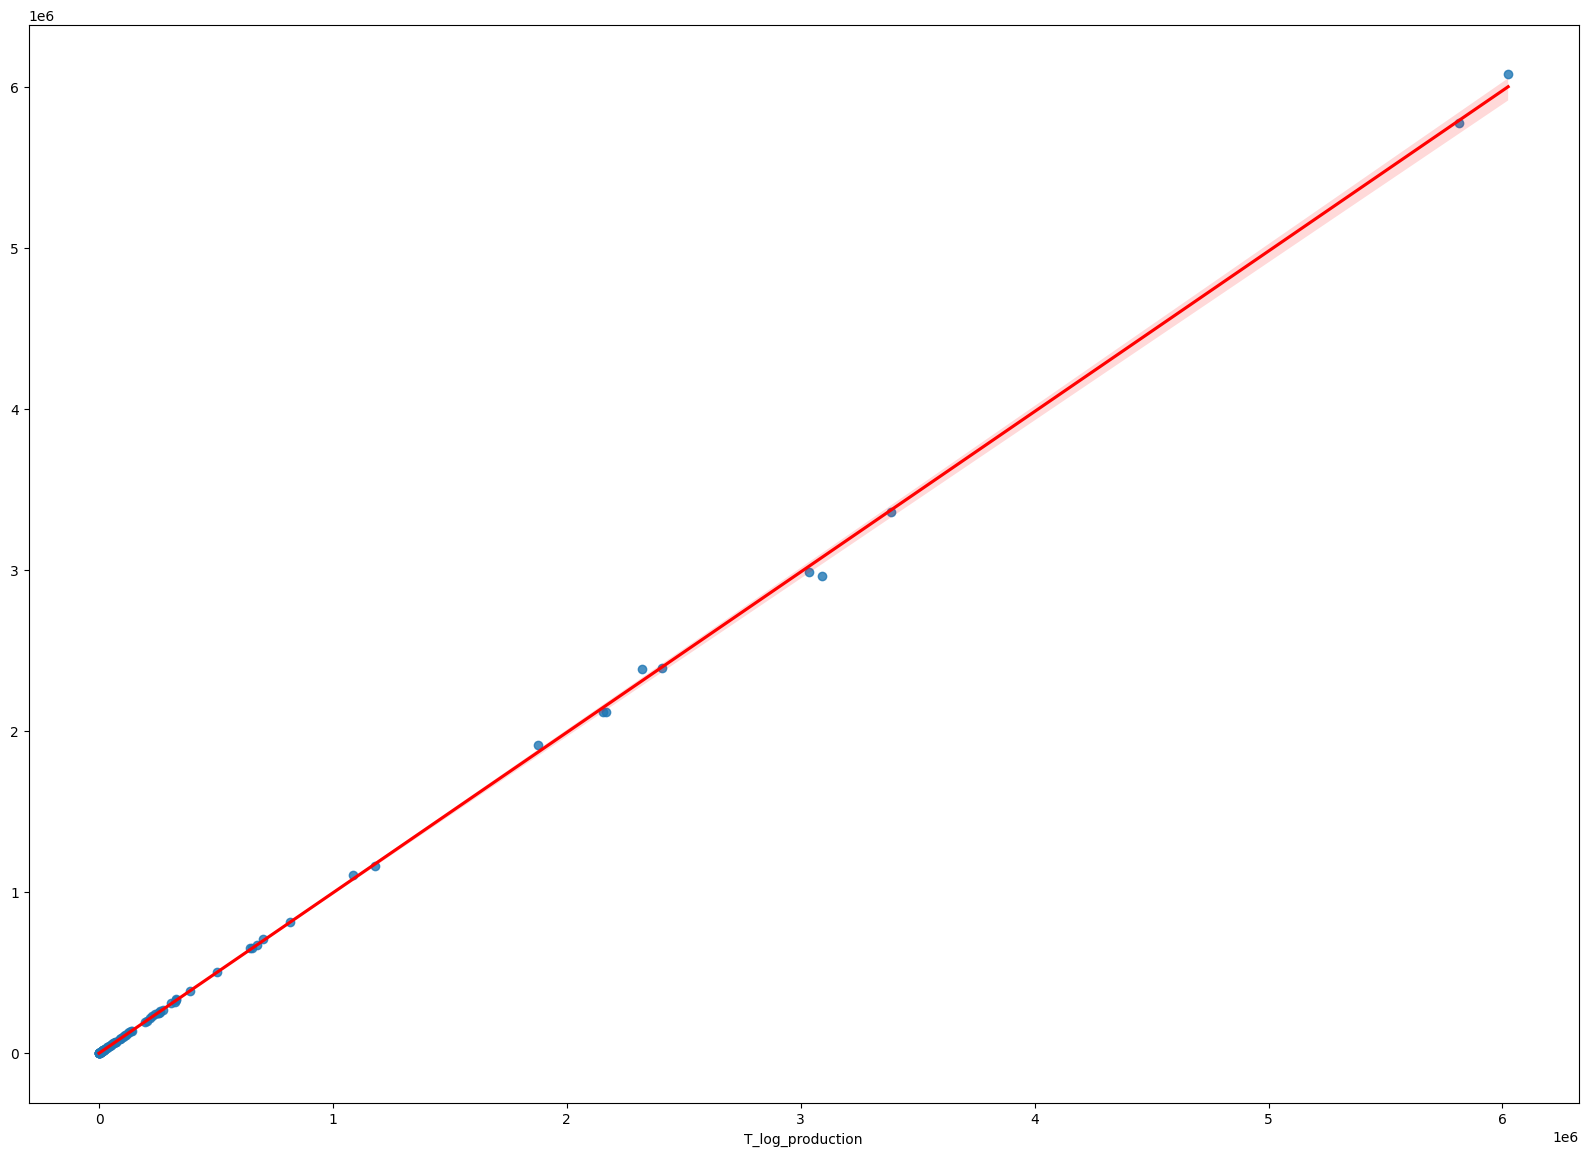

In [ ]:
params = {
    'n_estimators': [50, 100, 150, 300, 500, 700, 1000, 1500, 2000],
    'max_depth': [2, 3, 4, 5, 6, 7]
}


fitAndEvaluateModel(X, Y,
                    'Random Forest',
                     RandomForestRegressor(),
                    params, CV=5)

In [ ]:
models_scores

[{'Model': 'Random Forest',
  'MSE': 403409372.93252873,
  'RMSE': 20085.05347099003,
  'MAE': 7207.818806169521,
  'R2': 0.9996776002145239}]



> ### GradientBoostingRegressor



Fitting 5 folds for each of 4 candidates, totalling 20 fits
     Original  Predicted  Difference
0  2406437.00 2417510.31   -11073.31
1  1087329.00 1100680.77   -13351.77
2  2155473.00 2145861.33     9611.67
3   194714.00  194788.39      -74.39
4    22011.00   21882.71      128.29
..        ...        ...         ...
81  675725.00  677093.06    -1368.06
82  112763.00  112472.35      290.65
83  273017.00  272028.32      988.68
84  240608.00  243765.93    -3157.93
85   15481.00   15549.31      -68.31

[86 rows x 3 columns]
Best Params : {'max_depth': 5}
Root Mean squared error 19693.102513235997


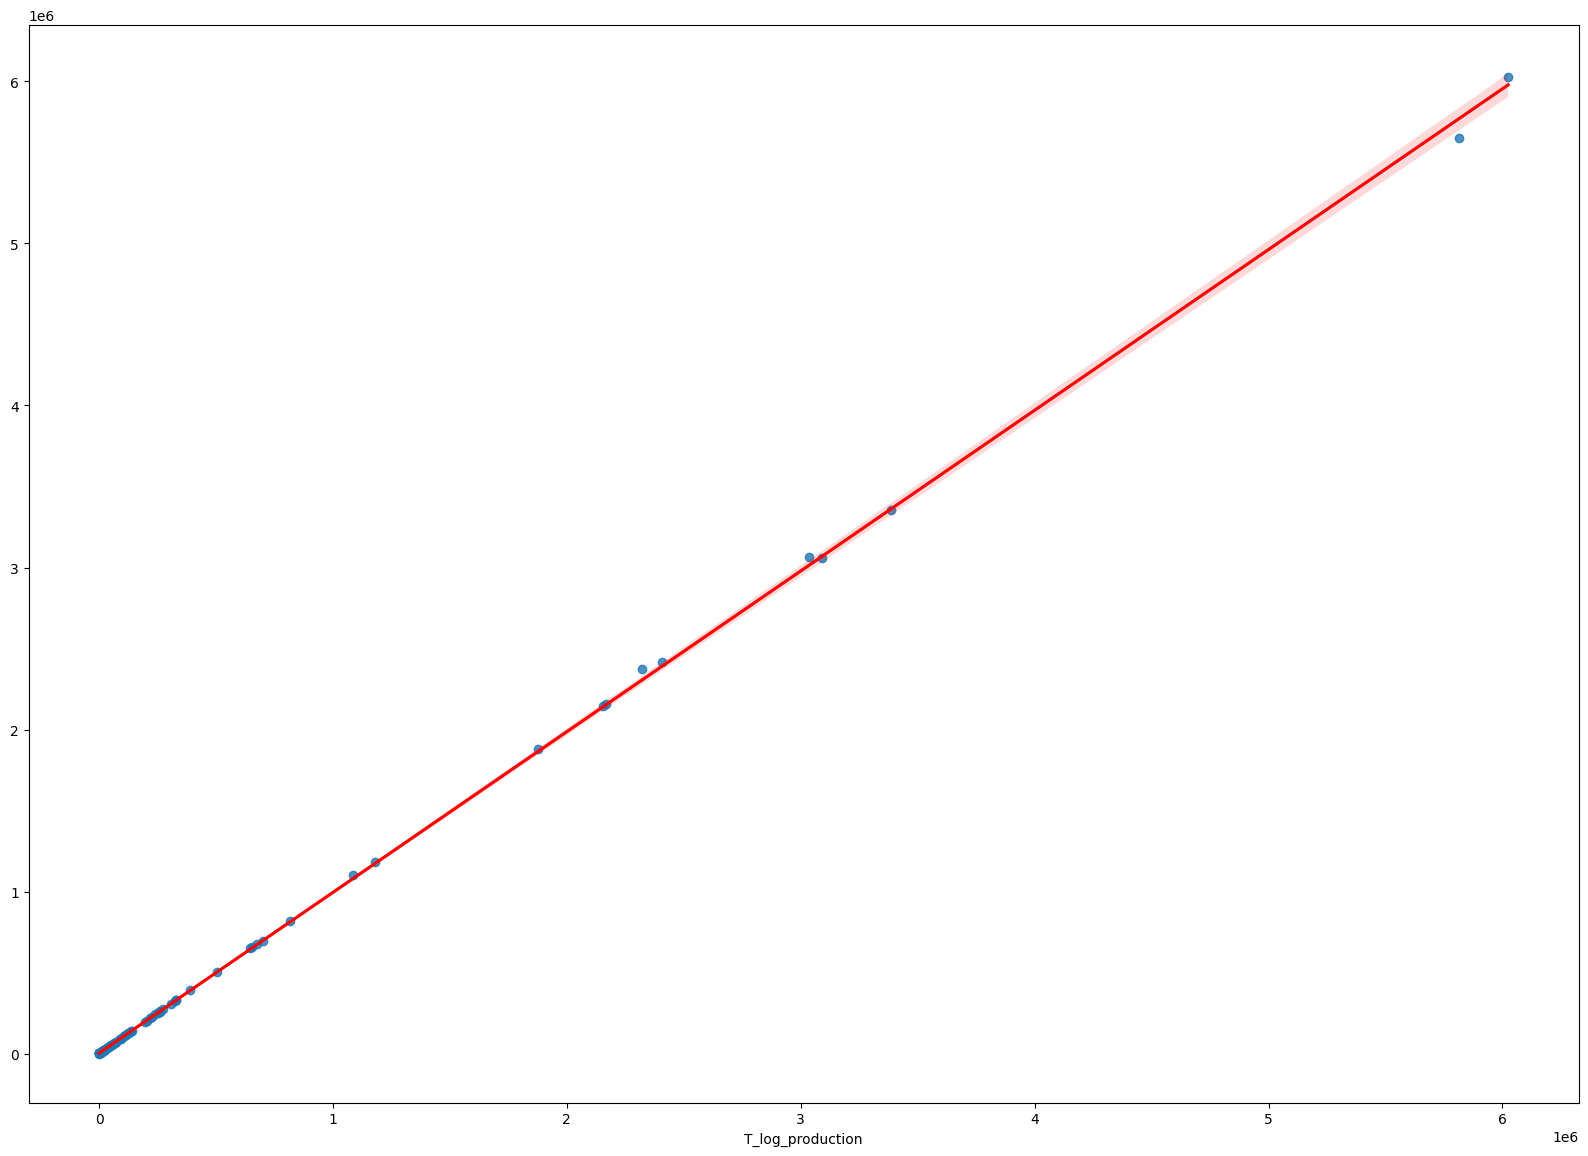

In [ ]:
params = {
    'max_depth': [2, 3, 4, 5]
}

fitAndEvaluateModel(X, Y,
                    'GradientBoostingRegressor',
                    GradientBoostingRegressor(),
                    params, CV=5)

In [ ]:
models_scores

[{'Model': 'Random Forest',
  'MSE': 403409372.93252873,
  'RMSE': 20085.05347099003,
  'MAE': 7207.818806169521,
  'R2': 0.9996776002145239},
 {'Model': 'GradientBoostingRegressor',
  'MSE': 387818286.59682196,
  'RMSE': 19693.102513235997,
  'MAE': 4727.0133010020845,
  'R2': 0.9996900604180473}]



> ### LogisticRegressor



In [ ]:
params = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
}

fitAndEvaluateModel(X,Y, 'LogisticRegressor', LogisticRegression(), params, CV=5)



> ### LinearRegression



Fitting 5 folds for each of 1 candidates, totalling 5 fits
     Original  Predicted  Difference
0  2406437.00 2406437.00       -0.00
1  1087329.00 1087329.00       -0.00
2  2155473.00 2155473.00       -0.00
3   194714.00  194714.00        0.00
4    22011.00   22011.00        0.00
..        ...        ...         ...
81  675725.00  675725.00       -0.00
82  112763.00  112763.00       -0.00
83  273017.00  273017.00        0.00
84  240608.00  240608.00        0.00
85   15481.00   15481.00        0.00

[86 rows x 3 columns]
Best Params : {}
Root Mean squared error 3.4554915629074014e-05


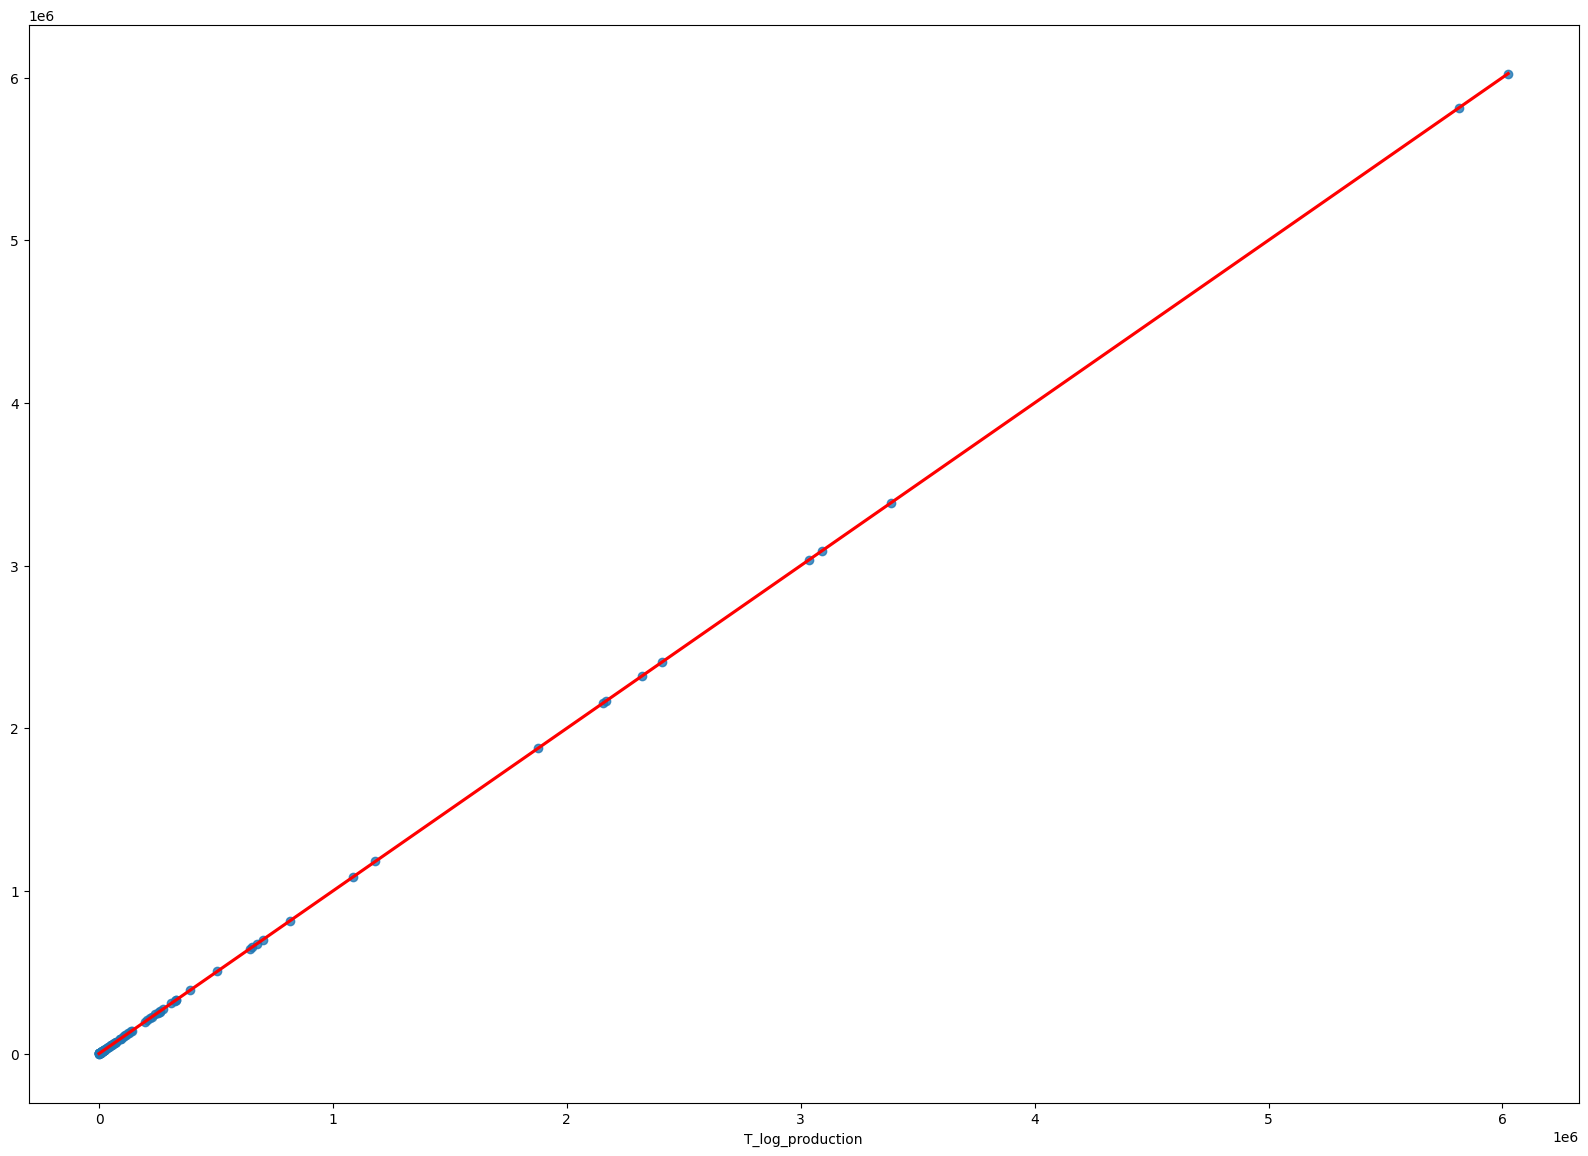

In [ ]:
params = {
}

fitAndEvaluateModel(X,Y, 'LinearRegression', LinearRegression(), params, CV=5)

In [ ]:
models_scores

[{'Model': 'Random Forest',
  'MSE': 403409372.93252873,
  'RMSE': 20085.05347099003,
  'MAE': 7207.818806169521,
  'R2': 0.9996776002145239},
 {'Model': 'GradientBoostingRegressor',
  'MSE': 387818286.59682196,
  'RMSE': 19693.102513235997,
  'MAE': 4727.0133010020845,
  'R2': 0.9996900604180473},
 {'Model': 'LinearRegression',
  'MSE': 1.1940421941324235e-09,
  'RMSE': 3.4554915629074014e-05,
  'MAE': 9.936963588677636e-06,
  'R2': 1.0}]



> ### RidgeRegression



Fitting 5 folds for each of 35 candidates, totalling 175 fits
     Original  Predicted  Difference
0  2406437.00 2406448.32      -11.32
1  1087329.00 1087312.81       16.19
2  2155473.00 2155478.68       -5.68
3   194714.00  194714.98       -0.98
4    22011.00   22011.11       -0.11
..        ...        ...         ...
81  675725.00  675717.68        7.32
82  112763.00  112763.21       -0.21
83  273017.00  273016.25        0.75
84  240608.00  240604.88        3.12
85   15481.00   15480.99        0.01

[86 rows x 3 columns]
Best Params : {'alpha': 0.01, 'solver': 'auto'}
Root Mean squared error 11.688283154698059


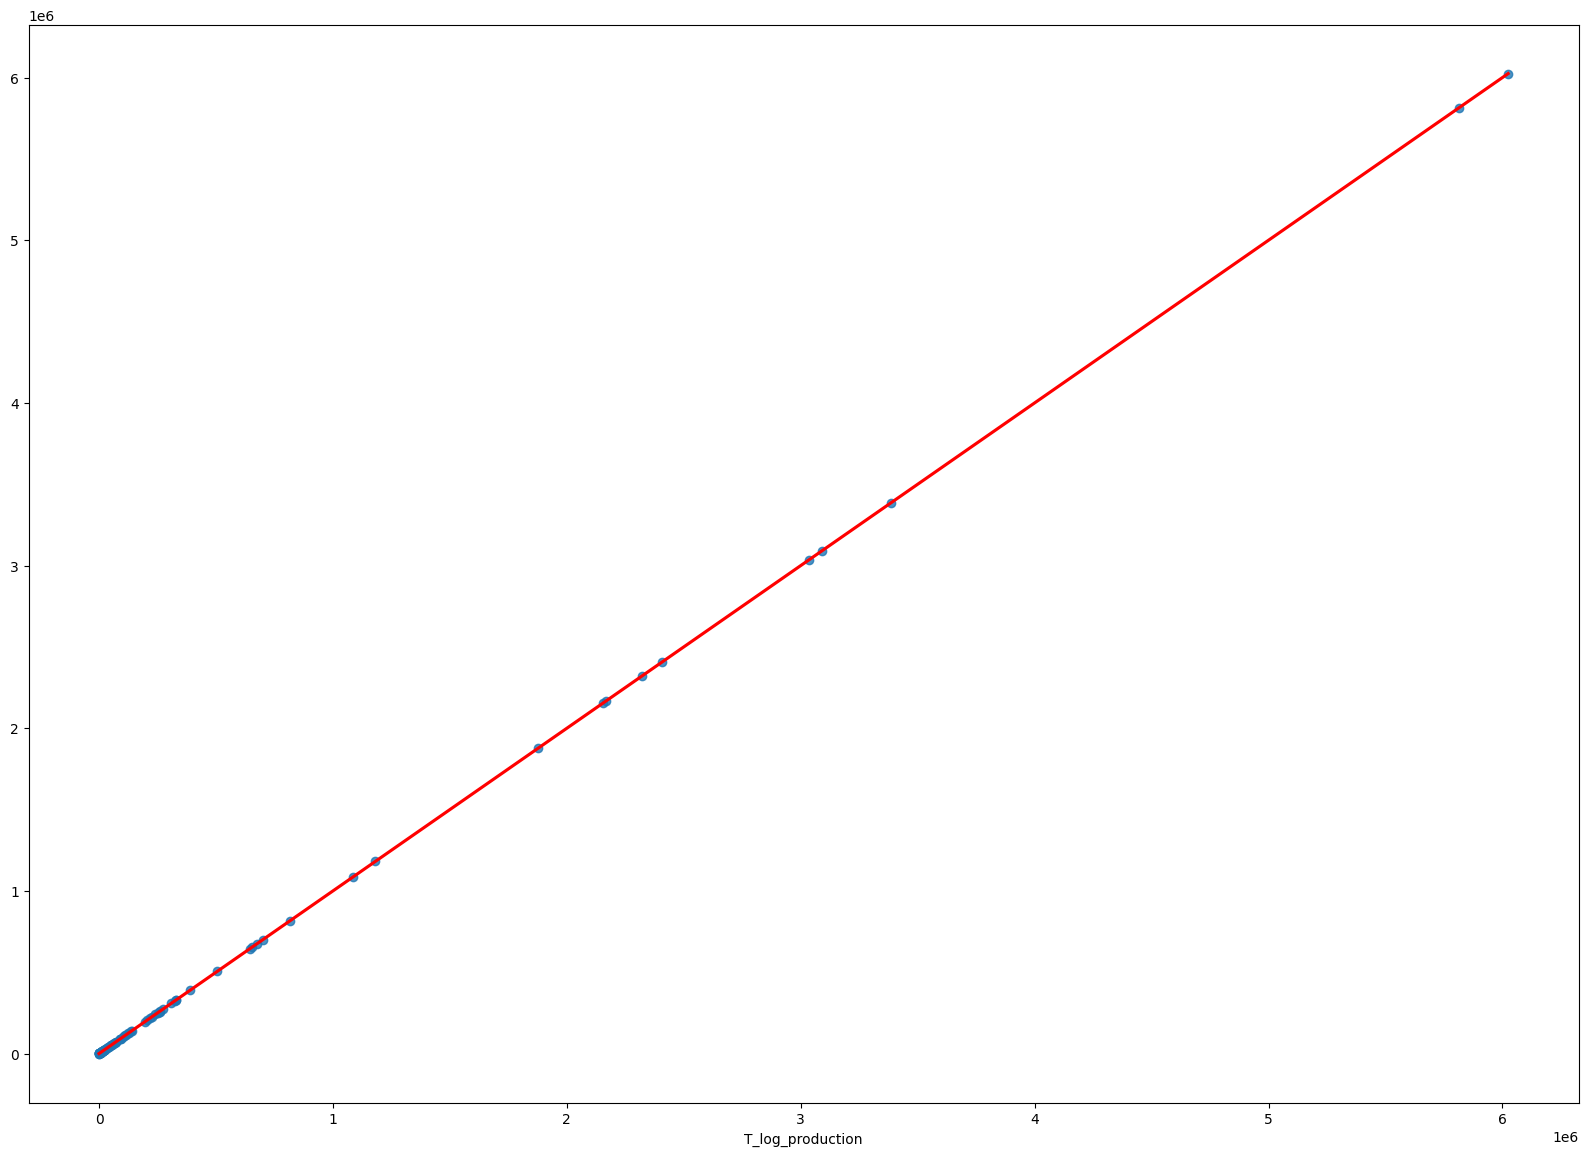

In [ ]:
params = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

fitAndEvaluateModel(X,Y, 'RidgeRegression', Ridge(), params, CV=5)

In [ ]:
models_scores

[{'Model': 'Random Forest',
  'MSE': 403409372.93252873,
  'RMSE': 20085.05347099003,
  'MAE': 7207.818806169521,
  'R2': 0.9996776002145239},
 {'Model': 'GradientBoostingRegressor',
  'MSE': 387818286.59682196,
  'RMSE': 19693.102513235997,
  'MAE': 4727.0133010020845,
  'R2': 0.9996900604180473},
 {'Model': 'LinearRegression',
  'MSE': 1.1940421941324235e-09,
  'RMSE': 3.4554915629074014e-05,
  'MAE': 9.936963588677636e-06,
  'R2': 1.0},
 {'Model': 'RidgeRegression',
  'MSE': 136.61596310439842,
  'RMSE': 11.688283154698059,
  'MAE': 3.9673475846344974,
  'R2': 0.9999999998908182}]



> ### SVR



In [ ]:
params = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
}

fitAndEvaluateModel(X,Y, 'SVR', SVR(), params, CV=5)

In [ ]:
models_scores



> ### KNeighborsRegressor



In [ ]:
params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
}

fitAndEvaluateModel(X,Y, 'KNeighborsRegressor', KNeighborsRegressor(), params, CV=5)

In [ ]:
models_scores



> ### LightGBM



In [ ]:
import lightgbm as lgb

params = {
    'max_depth': [-1, 10, 20, 30],
    'n_estimators': [100, 200, 500],
}

fitAndEvaluateModel(X, Y, 'LightGBM', lgb(), params, CV=5)



> ### CatBoost



In [ ]:
from catboost import CatBoostRegressor

params = {
    'iterations': [100, 200, 500],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
}

fitAndEvaluateModel(X, Y, 'CatBoost', CatBoostRegressor(), params, CV=5)